## L’essentiel sur les arbres de décision

In [80]:
def entropie(vect):
    _, counts = np.unique(vect, return_counts=True)
    py = np.array(counts / len(vect))
    return -np.sum(py * np.log(py))

entropie(np.array([1,2,3,4,2,3,4,1,2,1]))

1.366158847569202

In [90]:
def entropie_cond(list_vect):
    n = list_vect.shape[0]
    p = np.array((1, n))
    h = np.array((1, n))
    sum_per_vec = sum(len(part) for part in list_vect)
    for i in range(n):
            p[i] = len(list_vect[i]) / sum_per_vec
            h[i] = entropie(list_vect[i])
    return (np.sum(h * p))

print(entropie_cond(np.array([[1,2,3,4,2,3,4,1,2,1], [1,2,3,4,3,2,1,3,2,1]])))
print(entropie_cond(np.array([[1,2,3,4,2,3,4,1,2,1], [1,2,3,4,2,3,4,1,2,1]])))

0
0


In [92]:
import pickle
import numpy as np
# data : tableau(films, features), id2titles : dictionnaire id -> titre,
# fields : id feature -> nom
[data, id2titles, fields] = pickle.load(open("imdb_extrait.pkl","rb"))
# la derniere colonne est le vote
datax = data[:,:32]
datay = np.array([1 if x[33] > 6.5 else -1 for x in data])

print(data.shape)
print(len(id2titles))
print(len(fields))

# Calcul 1 :
# n, m = data.shape
# for i in range(n):
#     for j in range(m):
#         if np.sum(data[:,j]) == 1:
            

# Calcul 2 :



# 
#
#

(4587, 34)
4587
34


## Quelques expériences préliminaires

In [107]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier as DTree
import pydotplus
id2genre = [x[1] for x in sorted(fields.items())[:-2]]

dt = DTree()
dt.max_depth = 3 # on fixe la taille max de l’arbre a 3
dt.min_samples_split = 2 # nombre minimum d’exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5,:])
print(dt.score(datax, datay))
# utiliser http://www.webgraphviz.com/ par exemple ou https://dreampuf.github.io/GraphvizOnline
export_graphviz(dt, out_file ="tree3.dot", feature_names = id2genre)
# ou avec pydotplus
tdot = export_graphviz(dt, feature_names = id2genre)
pydotplus.graph_from_dot_data(tdot).write_pdf("tree3.pdf")

dt = DTree()
dt.max_depth = 5 # on fixe la taille max de l’arbre a 5
dt.min_samples_split = 2 # nombre minimum d’exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5,:])
print(dt.score(datax, datay))
# utiliser http://www.webgraphviz.com/ par exemple ou https://dreampuf.github.io/GraphvizOnline
export_graphviz(dt, out_file ="tree5.dot", feature_names = id2genre)
# ou avec pydotplus
tdot = export_graphviz(dt, feature_names = id2genre)
pydotplus.graph_from_dot_data(tdot).write_pdf("tree5.pdf")

dt = DTree()
dt.max_depth = 10 # on fixe la taille max de l’arbre a 10
dt.min_samples_split = 2 # nombre minimum d’exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5,:])
print(dt.score(datax, datay))
# utiliser http://www.webgraphviz.com/ par exemple ou https://dreampuf.github.io/GraphvizOnline
export_graphviz(dt, out_file ="tree10.dot", feature_names = id2genre)
# ou avec pydotplus
tdot = export_graphviz(dt, feature_names = id2genre)
pydotplus.graph_from_dot_data(tdot).write_pdf("tree10.pdf")

# Le nombre d'exemple diminue lorsque l'on parcours la profondeur de l'arbre
# C'est normal car on cherche de plus en plus de moyen de discriminer les exemples

# Plus on ajoute de la profondeur, plus le score de classificaton augmente
# C'est normal car lorsque la profondeur tend vers la profondeur maximum, on tend vers un overfit du modele

# Ce n'est pas un indicateur fiable si on veut un score de précision
# Il faudrait peut être normaliser le score grâce a le parametre de profondeur max
# Sinon on peut tester notre score sur des données de validation

0.7183344233703945
0.736647045999564
0.8495748855461086


True

## Sur et sous apprentissage

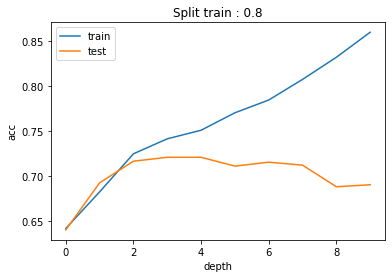

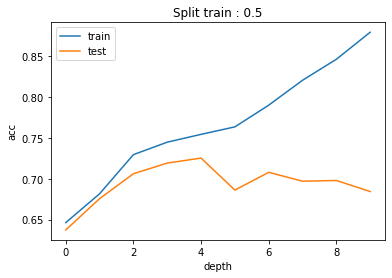

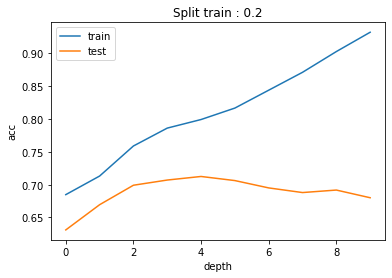

In [160]:
import matplotlib.pyplot as plt

def split_data(x, y, ratio):
    limit = int(ratio*len(x))
    return x[:limit], y[:limit], x[limit:], y[limit:]

def plot_acc(max_depth, datax_train, datay_train, datax_test, datay_test, k):
    acc_train = []
    acc_test = []
    for i in range(max_depth):
        dt = DTree()
        dt.max_depth = i+1
        dt.min_samples_split = 2
        dt.fit(datax_train, datay_train)
        dt.predict(datax_train[:5,:])
        acc_train.append(dt.score(datax_train, datay_train))
        acc_test.append(dt.score(datax_test, datay_test))
    plt.xlabel("depth")
    plt.ylabel("acc")
    plt.plot(acc_train, label="train")
    plt.plot(acc_test, label="test")
    plt.title(str("Split train : " + str(k)))
    plt.legend()
    plt.show()

max_depth = 10
for k in [0.8, 0.5, 0.2]:
    datax_train, datay_train, datax_test, datay_test = split_data(datax, datay, k)
    plot_acc(max_depth, datax_train, datay_train, datax_test, datay_test, k)

# Quand il y a peu de d'exemple d'apprentissage : l'accuracy train tend vers 1 rapidement et l'overfit est fort et l'accuracy test est a 0.7
# Quand il y a beaucoup d'exemple d'apprentissage : l'accuracy train tend moins rapidement vers 1 mais mais l'overfit est moins fort et l'accuracy test est un peu plus elevé (0.72)
# Le comportemenet est cependant semblable, les differentes courbes montrent un overfit.

# Les resultats semblent correct mais on perd beaucoup de data pour le train à cause du split
# On peut les ameliorer avec une validation croisee

## Validation croisée : sélection de modèle

Step : 0


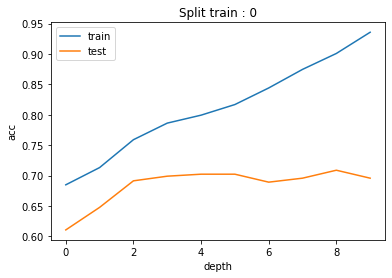

Step : 2


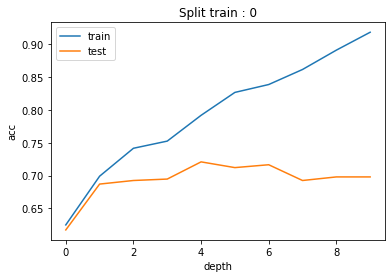

Step : 4


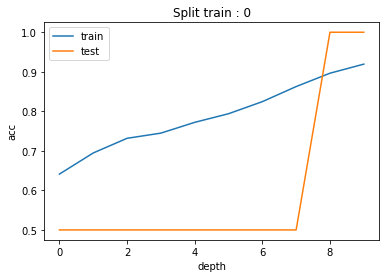

In [166]:
def crossvalid_split(x, y, n_chunk):
    n = x.shape[0]
    interval = n//n_chunk
    for i in range(0, n_chunk, 2):
        print("Step :", i)
        
        # chunkx et chunky sont seulement 1 chunk
        chunk_x = x[i*interval:(i+1)*interval]
        chunk_y = y[i*interval:(i+1)*interval]
        
        # chunkx2 et chunky2 doivent representer tt les data sauf le chunk d'avant
        chunk_x2 = x[(i+1)*interval:(i+2)*interval]
        chunk_y2 = y[(i+1)*interval:(i+2)*interval]
        plot_acc(10, chunk_x, chunk_y, chunk_x2, chunk_y2, 0)

crossvalid_split(datax, datay, 10)